In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

fontSize=40
sns.set_style('white')
sns.set_context("talk", font_scale=1.0, rc={'lines.linewidth': 6,
                                             'axes.linewidth': 4,
                                             'font.size': fontSize,
                                             'axes.labelsize': fontSize,
                                             'xtick.labelsize': fontSize,
                                             'ytick.labelsize': fontSize,
                                             'legend.fontsize': fontSize,
                                             'text.usetex': True,
                                             'font.family': 'sans-serif',
                                            'axes.axisbelow': True,
                                             })

BERT = pd.read_json("run-warmup_steps=1000_learning_rate=2e-05_training_steps=5000_runs_BERT-tag-Eval_Top-100.json")
rankfromsets = pd.read_json("run-optimizer_type=RMS_emb_size=10_batch_size=500_learning_rate=0.0001_runs_mean-tag-Eval_Top-100.json")
batch_size_BERT = 32
batch_size_rankfromsets = 500

In [2]:
rankfromsets.rename(columns={0: "rawTime", 1: "step", 2:"performance"}, inplace=True)
rankfromsets['complexity'] = rankfromsets['step'] * batch_size_rankfromsets

BERT.rename(columns={0: "rawTime", 1: "step", 2:"performance"}, inplace=True)
BERT['complexity'] = BERT['step'] * batch_size_BERT

In [3]:
time_list = [0]
beginning = rankfromsets['rawTime'][0]

for x in range(1, len(rankfromsets['rawTime'])):
    time_list.append(rankfromsets['rawTime'][x]-beginning)

rankfromsets['current_time'] = time_list

time_list = [0]
beginning = BERT['rawTime'][0]

for x in range(1, len(BERT['rawTime'])):
    time_list.append(BERT['rawTime'][x]-beginning)

BERT['current_time'] = time_list

In [4]:
# this is only to cut down to only the period when performance is improving, don't run if you want to keep the whole training process
rankfromsets = rankfromsets.iloc[:22]
BERT = BERT.iloc[:3]

In [5]:
# this just gets the lists of various data parameters so you can pick and choose what to plot
rankfromsets_seconds = list(rankfromsets['current_time'])
BERT_seconds = list(BERT['current_time'])
rankfromsets_performance = list(rankfromsets['performance'] / 100)
BERT_performance = list(BERT['performance'] / 100)
rankfromsets_complexity = list(rankfromsets['complexity'])
BERT_complexity = list(BERT['complexity'])

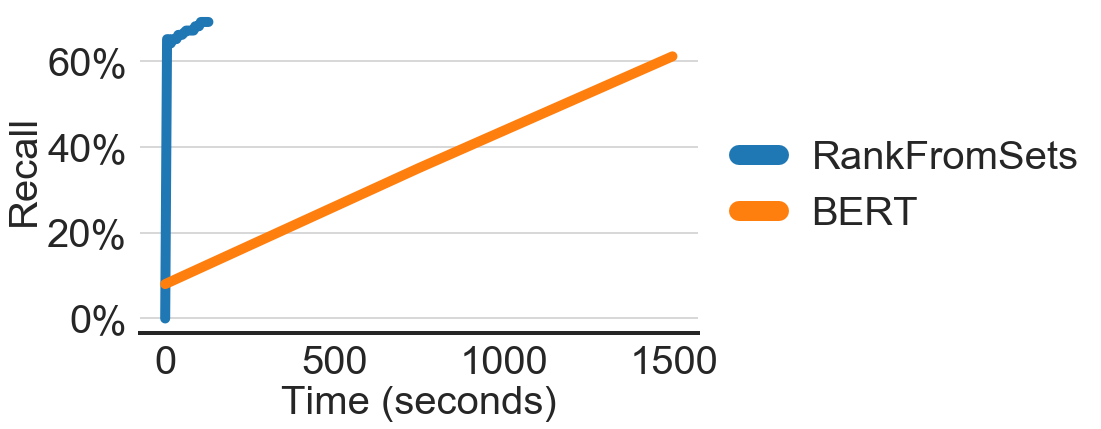

In [6]:
# formatting is upto you
fig, ax = plt.subplots(figsize=(10, 6))
# plt.ticklabel_format(style='plain', axis='x')
ax.plot(rankfromsets_seconds, rankfromsets_performance, linewidth=10, label='RankFromSets')
ax.plot(BERT_seconds, BERT_performance, linewidth=10, label='BERT')

handles, leglabels = plt.gca().get_legend_handles_labels()
# order = ['residual', 'inner', 'ctpf', 'word2vec', 'starspace', 'lstm', 'random']
# key2label = {v[0]: k for k, v in labels.items()}
# idx_order = [leglabels.index(labels[key][0]) for key in order]
leg = ax.legend(leglabels, 
          frameon=False, 
          handlelength=1,
          bbox_to_anchor=(1.01, 0.7))
for line in leg.get_lines():
    line.set_linewidth(20)
    
# fig.legend(loc='upper right', bbox_to_anchor=(1.32, 0.67), frameon=False, handlelength=1)


ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
ax.set(xlabel='Time (seconds)', ylabel='Recall')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.yaxis.grid()
# ax.set_yticks([0.0, 0.2, 0.4, 0.6])
# ax.legend()
sns.despine(left=True)
plt.savefig('../submissions/recsys-intrs-workshop-2020/fig/training-recall.pdf', bbox_inches='tight')

In [55]:
rankfromsets_performance[-1], BERT_performance[-1]

(0.69, 0.61)

In [8]:
rankfromsets_seconds[-1], BERT_seconds[-1]

(127.52929544448853, 1495.8762421607971)

In [9]:
BERT_seconds[-1] / rankfromsets_seconds[-1]

11.7296675791009

In [10]:
(4 * 60 + 54) / .12

2450.0